# 第十一章

## 11.1

In [1]:
from sklearn.datasets import load_wine
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
wine = load_wine()
svc = SVC(kernel='linear')
scores = cross_val_score(svc, wine.data, wine.target)
print('交叉验证得分:{}'.format(scores))

E:\Anaconda\Anaconda3\envs\env_2\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


交叉验证得分:[0.83333333 0.95       1.        ]


In [2]:
print('交叉验证平均分:{}'.format(scores.mean()))

交叉验证平均分:0.9277777777777777


In [4]:
scores = cross_val_score(svc,wine.data, wine.target, cv=6)
print('交叉验证得分:{}'.format(scores))

交叉验证得分:[0.86666667 0.9        0.93333333 0.96666667 1.         1.        ]


In [5]:
print('交叉验证平均分:{}'.format(scores.mean()))

交叉验证平均分:0.9444444444444445


In [6]:
print('酒的分类标签:\n{}'.format(wine.target))

酒的分类标签:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


In [9]:
from sklearn.model_selection import ShuffleSplit
shuffle_split = ShuffleSplit(test_size=.2, train_size=.7,n_splits=10)
scores = cross_val_score(svc, wine.data, wine.target,cv = shuffle_split)
print('随机交叉验证得分:{}'.format(scores))

随机交叉验证得分:[0.97222222 0.94444444 0.94444444 1.         0.97222222 0.97222222
 0.97222222 0.97222222 0.91666667 0.94444444]


In [11]:
from sklearn.model_selection import LeaveOneOut
cv = LeaveOneOut()
scores = cross_val_score(svc, wine.data, wine.target, cv=cv)
print('迭代次数:{}'.format(len(scores)))
print("模型平分：{:.3f}".format(scores.mean()))

迭代次数:178
模型平均分：0.955


## 11.2

In [15]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(wine.data,
                                                   wine.target,
                                                    random_state= 38)
best_score = 0
for alpha in [0.01, 0.1, 1, 10]:
    for max_iter in [100, 1000, 5000, 10000]:
        lasso = Lasso(alpha=alpha,max_iter=max_iter)
        lasso.fit(X_train,y_train)
        score = lasso.score(X_test,y_test)
        if score > best_score:
            best_score = score
            best_parameters = {'alpha':alpha,'最大迭代次数':max_iter}
            print("模型最高分：{:.3f}".format(best_score))
            print("最佳参数设置：{}".format(best_parameters))

模型最高分：0.889
最佳参数设置：{'alpha': 0.01, '最大迭代次数': 100}


In [16]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(wine.data,
                                                   wine.target,
                                                    random_state= 0)
best_score = 0
for alpha in [0.01, 0.1, 1, 10]:
    for max_iter in [100, 1000, 5000, 10000]:
        lasso = Lasso(alpha=alpha,max_iter=max_iter)
        lasso.fit(X_train,y_train)
        score = lasso.score(X_test,y_test)
        if score > best_score:
            best_score = score
            best_parameters = {'alpha':alpha,'最大迭代次数':max_iter}
            print("模型最高分：{:.3f}".format(best_score))
            print("最佳参数设置：{}".format(best_parameters))

模型最高分：0.819
最佳参数设置：{'alpha': 0.01, '最大迭代次数': 100}
模型最高分：0.830
最佳参数设置：{'alpha': 0.1, '最大迭代次数': 100}


In [18]:
import numpy as np
for alpha in [0.01,0.1,1.0,10.0]:
    for max_iter in [100,1000,5000,10000]:
        lasso = Lasso(alpha=alpha,max_iter=max_iter)
        scores = cross_val_score(lasso, X_train, y_train, cv=6)
        score = np.mean(scores)
        if score > best_score:
            best_score = score
            best_parameters={'alpha':alpha, '最大迭代数':max_iter}
            
print("模型最高分为：{:.3f}".format(best_score))
print('最佳参数设置：{}'.format(best_parameters))

模型最高分为：0.865
最佳参数设置：{'alpha': 0.01, '最大迭代数': 100}


In [19]:
lasso = Lasso(alpha=0.01, max_iter=100).fit(X_train, y_train)
print('测试数据集得分：{:.3f}'.format(lasso.score(X_test,y_test)))

测试数据集得分：0.819


In [20]:
from sklearn.model_selection import GridSearchCV
params = {'alpha':[0.01,0.1,1.0,10.0],
         'max_iter':[100,1000,5000,10000]}
grid_search = GridSearchCV(lasso,params,cv=6)
grid_search.fit(X_train, y_train)
print('模型最高分：{:.3f}'.format(grid_search.score(X_test, y_test)))
print('最优参数：{}'.format(grid_search.best_params_))

模型最高分：0.819
最优参数：{'alpha': 0.01, 'max_iter': 100}


In [21]:
print('交叉验证最高得分：{:.3f}'.format(grid_search.best_score_))

交叉验证最高得分：0.865


## 11.3

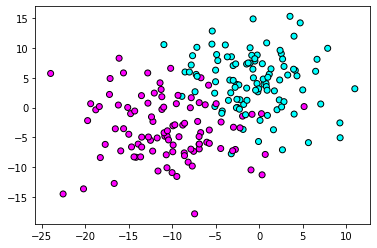

In [24]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
X, y = make_blobs(n_samples=200, random_state=1,centers=2,cluster_std=5)
plt.scatter(X[:,0],X[:,1],c=y,cmap = plt.cm.cool, edgecolor= 'k')
plt.show()

In [25]:
from sklearn.naive_bayes import GaussianNB
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=68)
gnb = GaussianNB()
gnb.fit(X_train,y_train)
predict_proba = gnb.predict_proba(X_test)
print('预测准确率形态:{}'.format(predict_proba.shape))

预测准确率形态:(50, 2)


In [26]:
print(predict_proba[:5])

[[0.98849996 0.01150004]
 [0.0495985  0.9504015 ]
 [0.01648034 0.98351966]
 [0.8168274  0.1831726 ]
 [0.00282471 0.99717529]]


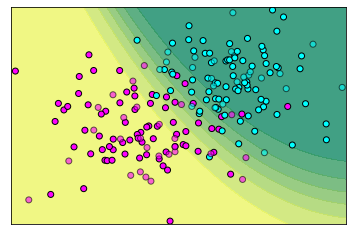

In [27]:
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.2),
                         np.arange(y_min, y_max, 0.2))

Z = gnb.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.summer, alpha=.8)

plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.cool,
                   edgecolor='k')
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=plt.cm.cool,
                   edgecolor='k', alpha=0.6)

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())
plt.show()


In [28]:
from sklearn.svm import SVC
svc = SVC().fit(X_train, y_train)
dec_func = svc.decision_function(X_test)
print (dec_func[:5])


[ 0.02082432  0.87852242  1.01696254 -0.30356558  0.95924836]


E:\Anaconda\Anaconda3\envs\env_2\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


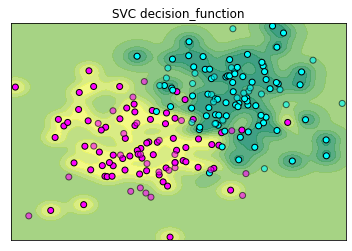

In [29]:
Z = svc.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.summer, alpha=.8)

plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.cool,
                   edgecolor='k')
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=plt.cm.cool,
                   edgecolor='k', alpha=0.6)

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title('SVC decision_function')
plt.xticks(())
plt.yticks(())
plt.show()